## Analyze A/B Test Results

This project will assure to have mastered the subjects covered in the statistics lessons.

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that we get some practice working with the difficulties of these 

For this project, we will be working to understand the results of an A/B test run by an e-commerce website.  The goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# code below will print (number rows, number cols)
df.shape

(294478, 5)

> from the result above, we can find the number of rows is <b> 294478 </b> and the number of cols is 5

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

> from the result above we find that the number of unique user is <b> 290584 </b>.

d. The proportion of users converted.

In [5]:
# proportion from all user
len(df.query('converted == 1'))*100/len(df)

11.965919355605513

In [6]:
# proportion from unique user
df.query('converted == 1').user_id.nunique()*100/df.user_id.nunique()

12.104245244060237

> the proportion of all users converted is 11.97% <br>
> the proportion of unique users converted is 12.10%

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
# see the combination of group and landing page
df.groupby('group').landing_page.value_counts()

group      landing_page
control    old_page        145274
           new_page          1928
treatment  new_page        145311
           old_page          1965
Name: landing_page, dtype: int64

In [8]:
# number of new page that not in treatment
new_page_not_treatment = len(df.query('group != "treatment" and landing_page == "new_page"'))
new_page_not_treatment

1928

In [9]:
# number of treatment that not in new_page
treatment_not_new_page = len(df.query('group == "treatment" and landing_page != "new_page"'))
treatment_not_new_page

1965

In [10]:
# number treatment and new page not match
new_page_not_treatment + treatment_not_new_page 

3893

f. Do any of the rows have missing values?

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


> from info above we find that we have 294478 rows and in all column was complete with the same number of rows. Its means missing value doesn't exist.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  So we will **remove** that rows  or **not use** that rows because we must use confidence data. 

a. Now remove that rows and store the new dataframe in **df2**.

In [12]:
df2 = df.query('(group == "treatment" and landing_page == "new_page") or (group == "control" and landing_page == "old_page")').copy()
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [13]:
# see the combination of group and landing page
df2.groupby('group').landing_page.value_counts()

group      landing_page
control    old_page        145274
treatment  new_page        145311
Name: landing_page, dtype: int64

In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [15]:
# lets see the info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


> from that table above we found that user_id **773192** is duplicate with same group, landing_page, and converted. The different just in timestamp

c. What is the row information for the repeat **user_id**? 

The row information is that duplicate appears in index **2893** with all same information except the timestamp

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
# remove the duplicated user_id
df2.drop_duplicates('user_id', inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2.converted.mean()

0.11959708724499628

> because the col converted was 1 and 0, so the proportion of converted (1) can represented by the mean of that columns

b. Given that an individual was in the `control` group, what is the probability they converted?

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
# to answer the two question above, we can find by this code
df2.groupby("group",as_index=False).mean()

,group,user_id,converted
0,control,788164.072594,0.120386
1,treatment,787845.719290,0.118808


> from that output we can find that probability converted in control group is **0.1204** and probability converted in treatment group is **0.1188**

d. What is the probability that an individual received the new page?

In [21]:
len(df2.query("landing_page=='new_page'"))/len(df2)

0.5000619442226688

In [22]:
len(df2.query("landing_page=='old_page'"))/len(df2)

0.4999380557773312

> new_page and old_page relatively have same probability, that is 0.5 <br>
> it's mean that the weight of new_page and old_page is 1:1

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Conclusion** 
<br>
Information we found from Part I was:
1. The weight of A/B test was relatively balanced, so the sensitivity by different converted was the same
2. The converted rate from group control is 12.04% and the converted rate from group treatment is 11.88%
3. The different of converted rate is 0.16%

> from data we have, the conversion rate between new_page was less than old_page but the different rate just 0.16%. We can't make a conclusion that old_page was better than new_page in conversion rate because we must to know is the difference significant or not. If the difference was significant so we can conclude that old_page have conversion rate more than new_page, if not significant, we can conclude that is no different between old_page and new_page in conversion rate. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Hypothesis**

$H_{0}$ : $p_{new}$ <= $p_{old}$, the converted rate from new page not better than old page
<br>
$H_{1}$ : $p_{new}$ > $p_{old}$, the converted rate from new page was better than old page

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [23]:
# by assumption in number 2, we can find the pnew was:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [24]:
# by assumption in number 2, we can find the pold was:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [25]:
# the number of individuals in the treatment group?
n_new = len(df2.query("group=='treatment'"))
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [26]:
# the number of individuals in the control group?
n_old = len(df2.query("group=='control'"))
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted = np.random.binomial(1, size = n_new, p = p_new)

In [28]:
# lets find the convertion rate
new_page_converted.mean()

0.1198334595003785

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted = np.random.binomial(1, size = n_old, p = p_old)
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
# lets find the convertion rate
old_page_converted.mean()

0.12139818549774908

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
new_page_converted.mean() - old_page_converted.mean()

-0.001564725997370578

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [32]:
# make array to save di converted rate
p_diffs = []

# make 10000 sampling and append the different in p_diffs
for _ in range(10000):
    new_page_converted = np.random.binomial(1, size = n_new, p = p_new)
    old_page_converted = np.random.binomial(1, size = n_old, p = p_old)
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

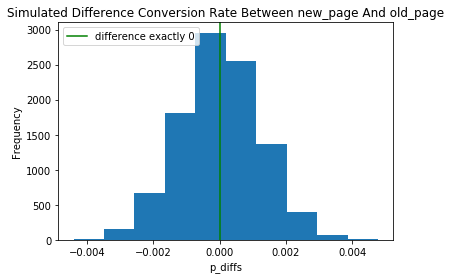

In [33]:
# convert p_diffs to numpy array
p_diffs = np.array(p_diffs)

# plot the distribution
plt.hist(p_diffs)
plt.axvline(x=0, color='g', label="difference exactly 0")
plt.legend(loc = 'upper left')
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Simulated Difference Conversion Rate Between new_page And old_page');

In [34]:
scipy.stats.describe(p_diffs)

DescribeResult(nobs=10000, minmax=(-0.004400210720678921, 0.0047676946799768555), mean=7.92322227534964e-06, variance=1.4423476179133853e-06, skewness=0.0002464309403299749, kurtosis=0.016743753400350503)

> from the histogram and described above, we found that the data was relatively normed with mean, median, and mode relatively 0

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
# first lets fine the actual difference
# p_diffs was p_new - p_old, so actual diff was:
actual_diff = df2.query("landing_page == 'new_page'").converted.mean() - df2.query("landing_page == 'old_page'").converted.mean()
actual_diff

-0.0015782389853555567

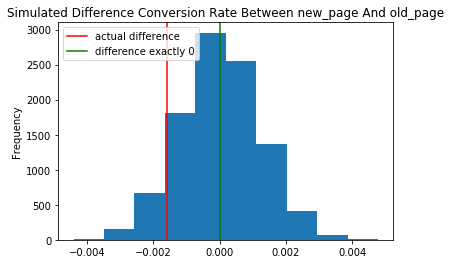

In [36]:
# plot line for actual different in our histogram
plt.hist(p_diffs)
plt.axvline(x=actual_diff, color='r', label="actual difference")
plt.axvline(x=0, color='g', label="difference exactly 0")
plt.legend(loc = 'upper left')
plt.ylabel('Frequency')
plt.title('Simulated Difference Conversion Rate Between new_page And old_page');

In [37]:
# then lets find the proportion of p_diffs greater than the actual difference
(p_diffs > actual_diff).mean()

0.9067

> the proportion of the p_diffs are greater than the actual difference observed in ab_data.csv is **0.9**

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

> in part j, we actually compute p-values, the probability which determines that our observation is accepted the null hypothesis or not. From assumption part II we declare error rate or alpha is 5%. Our p-value was greater than alpha, so we can't reject the null hypothesis. It's mean, from statistics is significant that the new_page not making conversion rate better than old_page (less or same with old_page)

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

convert_old = len(df2.query('landing_page == "old_page" & converted == 1'))
convert_new = len(df2.query('landing_page == "new_page" & converted == 1'))
n_old = len(df2.query('landing_page == "old_page"'))
n_new = len(df2.query('landing_page == "new_page"'))

print("the number of old_page is",n_old,", the number converted in old_page is",convert_old)
print("the number of new_page is",n_new,", the number converted in new_page is",convert_new)

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


the number of old_page is 145274 , the number converted in old_page is 17489
the number of new_page is 145310 , the number converted in new_page is 17264


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

**To remember, our hyphotesis are:**

$H_{0}$ : $p_{new}$ <= $p_{old}$, the converted rate from new page not better than old page
<br>
$H_{1}$ : $p_{new}$ > $p_{old}$, the converted rate from new page was better than old page

In [39]:
z_stat, p_value = sm.stats.proportions_ztest(count = np.array([convert_new, convert_old]), \
                                             nobs = np.array([n_new, n_old]), alternative = 'larger')
print("the z_stat is",z_stat,"and the p_value is",p_value)

the z_stat is -1.3109241984234394 and the p_value is 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [40]:
# to prove that point j-k are same with point n, lets print our critical value
from scipy.stats import norm

# critical point from confidence level 95% (minus because we use left area)
print(-1*norm.ppf(1-(0.05)))

-1.6448536269514722


**Conclusion**
<br>
Infromation we have:
1. the question m was doing z-test to our page following the hyphotesis
2. point k we found p-value = 0.9
3. from stat method, we found z_stat = -1.3109241984234394 and p-value = 0.9
4. We will reject $H_{0}$ if our p-vale < 0.05 and our z-score < -1.645

> from point 2 and 3 not suitable with point 4 so our calculation in poin j-k are same with point m, that we can't reject $H_{0}$ so the new_page is less or same with old_page in conversion rate

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Because our dependent variable is a binary variable, converted or not converted. So the type of regression is **Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [41]:
# add intercept column
df2['intercept'] = 1
# add column dummies
df2[['control', 'treatment']] = pd.get_dummies(df['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [42]:
# delete dummies from control because we don't need it, and rename treatment to ab_page (just like point b)
df2 = df2.drop('control',axis = 1)
df2 = df2.rename(columns={'treatment': 'ab_page'})
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [43]:
lm = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 19 Apr 2019   Pseudo R-squ.:               8.077e-06
Time:                        11:41:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Hyphotesis Part II are:**

$H_{0}$ : $p_{new}$ <= $p_{old}$, the converted rate from new page not better than old page
<br>
$H_{1}$ : $p_{new}$ > $p_{old}$, the converted rate from new page was better than old page

**Hyphotesis Part III are:**

$H_{0}$ : $p_{new}$ = $p_{old}$, the converted rate from new page same with old page
<br>
$H_{1}$ : $p_{new}$ != $p_{old}$, the converted rate from new page was different with old page

**The information we have:**
<br>
from point d we have p-value 0.19, that p-value is more than alpha (0.05) so we can conclude that are no different conversion rate between old_page and new_page. The p-value was different with Part II because **we have different hyphotesis**, but all of them are **not reject** $H_{0}$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Other things**:
<br>
1. Yes, we can use other things, moreover, we have a timestamp variable
2. From the timestamp, we can find the day of the week (Sunday, Monday or other) maybe this can be useful. As explained in the introduction, we make A/B test for an e-commerce company, so there is maybe have a special day to convert (especially weekends or not)
3. Beside days, maybe hours are also important. For example, the user will convert more before 18 than after this hour.
4. We also can found hour and weekend or not when their convert

**Disadvantages**:
<br>
1. There are a lot of things to do but we can say that it will make more good regression or make a different conclusion because sometimes little variable work better than many variable
2. Too much variable will need much time for run the regression
3. Maybe the variable has a strong correlation with another variable so they will decrease their coefisien each other

**Let's Try it!**
<br>
first, we must make column to save dayofweek, weekend or not, and hour

In [45]:
df3 = df2.copy()
df3.timestamp = pd.to_datetime(df3.timestamp)
df3['dayofweek'] = df3.timestamp.dt.dayofweek
df3['hour'] = df3.timestamp.dt.hour
df3['weekend'] = (df3.dayofweek // 5 == 1).astype(int)
df3['hourconvert'] = df3.hour * df3.converted
df3['weekendconvert'] = df3.weekend * df3.converted
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,dayofweek,hour,weekend,hourconvert,weekendconvert
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,5,22,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,3,8,0,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,2,16,0,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,6,18,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,5,1,1,1,1


In [46]:
# let's see the statistic
df3.groupby("landing_page",as_index=False).mean()

,landing_page,user_id,converted,intercept,ab_page,dayofweek,hour,weekend,hourconvert,weekendconvert
0,new_page,787845.719290,0.118808,1.0,1,2.892664,11.502223,0.273113,1.384261,0.032021
1,old_page,788164.072594,0.120386,1.0,0,2.890724,11.510552,0.274640,1.390242,0.033516


In [47]:
# from the mean above, new_page and old_page relatively have same mean in dayofweek, 
# hour, hourconvert, converted rate and weekend rate
# lets make module to check p-value, it will make easier for us to prove we reject H0 or not
def check_pvalue(data, threshold):
    threshold_old = len(data.query('landing_page == "old_page" & ' + threshold))
    threshold_new = len(data.query('landing_page == "new_page" & ' + threshold))
    n_old = len(data.query('landing_page == "old_page"'))
    n_new = len(data.query('landing_page == "new_page"'))
    
    z_stat, p_value = sm.stats.proportions_ztest(count = np.array([threshold_new, threshold_old]), \
                                             nobs = np.array([n_new, n_old]), alternative = 'larger')
    
    return p_value

**Hyphotesis from module above**

$H_{0}$ : $p_{new}$ <= $p_{old}$, the threshold from new page not better than old page
<br>
$H_{1}$ : $p_{new}$ > $p_{old}$, the threshold from new page was better than old page

In [48]:
# because we have 7 day, lets check from the median
print("p-value from dayofweek",check_pvalue(df3, 'dayofweek <= 3')) 
# lets check from the middle of morning and night
print("p-value from hour",check_pvalue(df3, 'hour <= 18')) 
# lets check from the middle of morning and night of hourconvert
print("p-value from hourconvert",check_pvalue(df3, 'hourconvert <= 18')) 
# lets check this is weekend or not
print("p-value from weekend",check_pvalue(df3, 'weekend == 1'))
# lets check this is weekend or not
print("p-value from weekend",check_pvalue(df3, 'weekendconvert == 1'))

p-value from dayofweek 0.5229041458356865
p-value from hour 0.06495254373962452
p-value from hourconvert 0.6573436330940624
p-value from weekend 0.8219732198805831
p-value from weekend 0.9881830071821641


from p-value above we can make **conclusion**:
<br>
1. Count from day <= 3 (Mon, Tues, Wed, Thurs) in new_page is same or less than old_page because the p-value is 0.523 (more than 0.05)
2. Count from hour <= 18 in new_page is same or less than old_page because the p-value is 0.065 (more than 0.05) but if we use confidence level 90%, we can conclude that  people convert less than hour 18 in new page is more than in old page
3. The hour convert <= 18 in new_page is same or less than old_page because the p-value is 0.657 (more than 0.05)
4. Count from weekend or not in new_page is same or less than old_page because the p-value is 0.822 (more than 0.05)
5. Count from is convert in weekend or not in new_page is same or less than old_page because the p-value is 0.988 (more than 0.05)

**Let's try with regression!**

In [49]:
lm2 = sm.Logit(df3['converted'],df3[['intercept','ab_page','dayofweek','hour','weekend']])
results2 = lm2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366101
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Fri, 19 Apr 2019   Pseudo R-squ.:               5.699e-05
Time:                        11:42:00   Log-Likelihood:            -1.0638e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.01643
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9982      0.016   -126.938      0.000      -2.029      -1.967
ab_page       -0.0149      0.011     -1.304      0.192      -0.037       0.008
dayofweek     -0.0084      0.005     -1.812      0.070      -0.017       0.001
hour           0.0022      0.001      2.642      0.008       0.001       0.004
weekend        0.0307      0.021      1.458      0.145      -0.011       0.072
==============================================================================
"""

Remember that hyphotesis in regression is different with we used before, so the result also different. From regression, variable ab_page, dayofweek, and weekend are not reject $H_{0}$ but variable hour is reject $H_{0}$, so there is some different hour in new_page and old_page.
<br> <br>
**Note**: hourconvert not in regression because it make worst p-value, and weekendconvert not in regression because it make singular matrix

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [50]:
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [51]:
df_country = df2.set_index('user_id').join(countries.set_index('user_id'), how='inner')
df_country.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [52]:
# lets see what country we have
df_country.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [53]:
# create the necessary dummy variables
df_country[['CA','UK', 'US']]= pd.get_dummies(df_country['country'])
df_country.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [54]:
# let's check the count conversion by country
df_country.groupby(["landing_page","country"],as_index=False).mean()

,landing_page,country,converted,intercept,ab_page,CA,UK,US
0,new_page,CA,0.111902,1.0,1,1,0,0
1,new_page,UK,0.121171,1.0,1,0,1,0
2,new_page,US,0.118466,1.0,1,0,0,1
3,old_page,CA,0.118783,1.0,0,1,0,0
4,old_page,UK,0.120022,1.0,0,0,1,0
5,old_page,US,0.120630,1.0,0,0,0,1


> from information above, we can find that:
1. conversion rate country CA in old_page was larger 0.006 than new_page (0.6%)
2. conversion rate country UK in old_page was smaller 0.001 than new_page (-0.1%)
3. conversion rate country US in old_page was larger 0.002 than new_page (0.2%)

> but just like before, we can't make conclusion which is better because we need to know that the different is significant or not.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [55]:
# let's check the all country effect or not, to make it easier we need module:
def country_to_numeric(country):
    if country=='CA':
        return 0
    if country=='UK':
        return 2
    if country=='US':
        return 1

In [56]:
# and module to check summary of linear model
def logit_sumamry(columns):
    lm_country = sm.Logit(df_country['converted'],df_country[columns])
    results_country = lm_country.fit()
    return results_country

In [57]:
# let's make column with numeric country
df_country['country_num'] = df_country['country'].apply(country_to_numeric)
df_country.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,country_num
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,1


In [58]:
# fit linear model with numeric categorical
logit_sumamry(['intercept','ab_page','country_num']).summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 19 Apr 2019   Pseudo R-squ.:               1.870e-05
Time:                        11:42:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1367
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0091      0.016   -127.758      0.000      -2.040      -1.978
ab_page        -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_num     0.0169      0.011      1.504      0.133      -0.005       0.039
===============================================================================
"""

> from summary above we can see that p-value still more than 0.05 so there is not different about country in new page and old page

In [59]:
# fit linear model with CA
logit_sumamry(['intercept','ab_page','CA']).summary()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 19 Apr 2019   Pseudo R-squ.:               2.064e-05
Time:                        11:42:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1113
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9867      0.008   -243.359      0.000      -2.003      -1.971
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
CA            -0.0434      0.027     -1.627      0.104      -0.096       0.009
==============================================================================
"""

In [60]:
# fit linear model with UK
logit_sumamry(['intercept','ab_page','UK']).summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 19 Apr 2019   Pseudo R-squ.:               1.233e-05
Time:                        11:42:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.2693
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9919      0.009   -228.420      0.000      -2.009      -1.975
ab_page       -0.0150      0.011     -1.309      0.191      -0.037       0.007
UK             0.0126      0.013      0.952      0.341      -0.013       0.038
==============================================================================
"""

In [61]:
# fit linear model with US
logit_sumamry(['intercept','ab_page','US']).summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Fri, 19 Apr 2019   Pseudo R-squ.:               8.152e-06
Time:                        11:42:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.4201
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9877      0.012   -167.205      0.000      -2.011      -1.964
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
US            -0.0016      0.012     -0.126      0.900      -0.026       0.023
==============================================================================
"""

> the answer also same (not reject H0) if we check one by one. So the conclution is country doesn't affect wheather they are convert or not because the country in new_page are not different with old_page

<a id='conclusions'></a>
## Conclusions
1. From the data we have, there is not enough evidence to prove that new_page is better than old_page
2. The limitation is we just use data convert, country, and timestamp, maybe there is another variable which effect conversion rate in new_page and old_pagepage that not include in this analyze

## Suggestion to Company
1. Because the result shows that is no different significantly in conversion rate between old_page and new_page so it's up to you that you will choose old_page or new_page
2. We have some insight that maybe usefull, they are:
    - the average day in this data is Tuesday and Wednesday, and the average participant convert in weekday
    - the average hour in this data is 11 - 12, but the average participant convert at 01 or 02

In [63]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0